## Import Packages

In [18]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## A simple cost function

$f(x) = x^2 + x + 1$

In [19]:
def f(x):
    return x**2 + x + 1

In [20]:
# Make Data

x_1 = np.linspace(start = -3, stop = 3, num = 500)

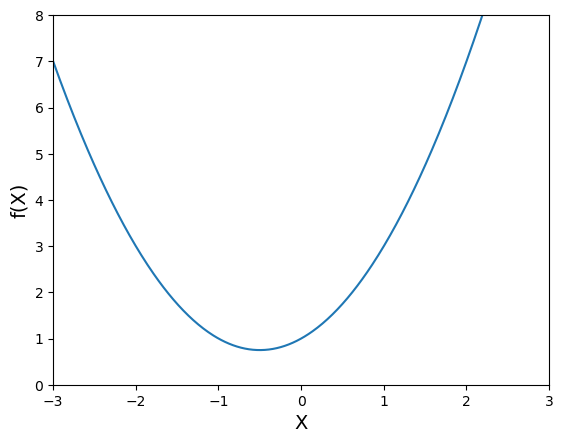

In [21]:
# plot
plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)

plt.plot(x_1, f(x_1))
plt.show()

## Slope and Derivatives
Create a python function to find derivative of f(x) called df(x)

In [22]:
def df(x):
    return (2*x + 1)

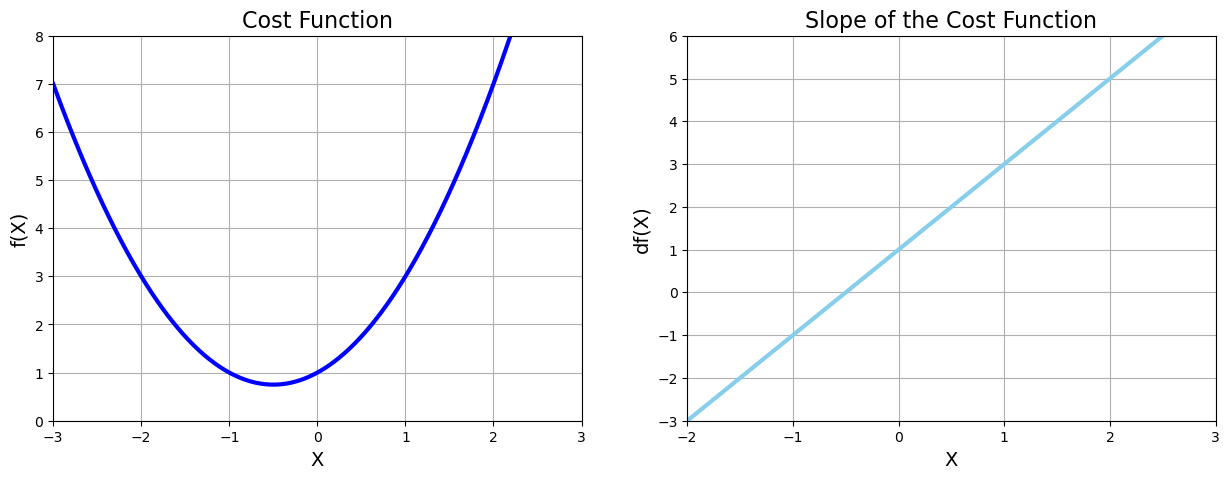

In [23]:
# plot function and derivative side by side

plt.figure(figsize=[15, 5])

# Chart-1 for cost function
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)
plt.grid()

plt.plot(x_1, f(x_1), color = 'blue', linewidth = 3)

# Chart-2 for Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)
plt.grid()

plt.xlim([-2, 3])
plt.ylim([-3, 6])

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3)


plt.show()

## Gradient Descent

In [28]:
# Gradient Descent

new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = .0001

x_list = [new_x]
slope_list =[df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope od df(x) value at this point si:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 40
Local minimum occurs at: -0.49962781616118024
Slope od df(x) value at this point si: 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


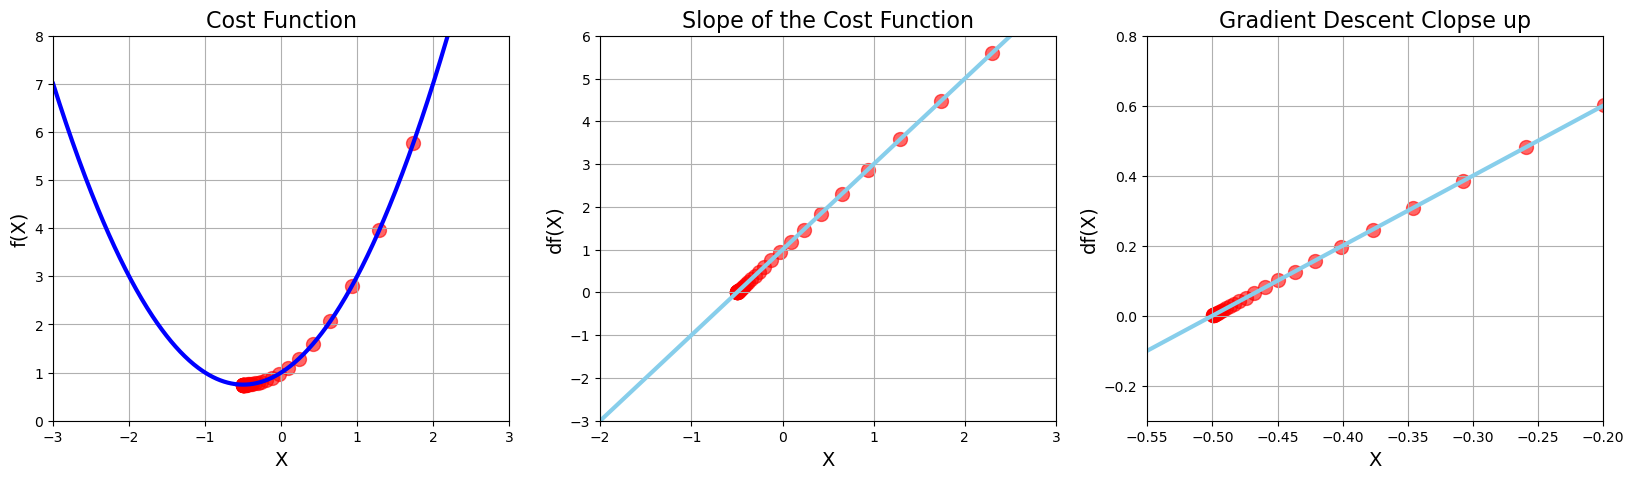

In [37]:
# Gradient descent om plot

plt.figure(figsize=[20, 5])

# Chart-1 for cost function
plt.subplot(1, 3, 1)

plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)
plt.grid()

plt.plot(x_1, f(x_1), color = 'blue', linewidth = 3)

values = np.array(x_list)
plt.scatter(x_list, f(values), color = 'red', s = 100, alpha = 0.6)

# Chart-2 for Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)
plt.grid()

plt.xlim([-2, 3])
plt.ylim([-3, 6])

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3)
plt.scatter(x_list, slope_list, color = 'red', s =100, alpha = .6)

# Chart-2 for Derivative
plt.subplot(1, 3, 3)

plt.title('Gradient Descent Clopse up', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)
plt.grid()

plt.xlim([-0.55, -0.2])
plt.ylim([-0.3, 0.8])

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3)
plt.scatter(x_list, slope_list, color = 'red', s =100, alpha = .6)

plt.show()